In [72]:
import pandas
import matplotlib.pyplot as plt
from pmdarima import auto_arima, ARIMA, model_selection

df = pandas.read_csv('data/BTC-USD.csv')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3435,2024-02-12,48296.386719,50280.476563,47745.761719,49958.222656,49958.222656,34511985805
3436,2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,49742.441406,35593051468
3437,2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,51826.695313,39105608050
3438,2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,51938.554688,38564360533


In [8]:
df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace = True)
df.head

<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-02-12  48296.386719  50280.476563  47745.761719  49958.222656   
2024-02-13  49941.359375  50358.390625  48406.496094  49742.441406   
2024-02-14  49733.445313  52021.371094  49296.832031  51826.695313   
2024-02-15  51836.785156  52820.066406  51371.628906  51938.554688   
2024-02-16  51937.726563  52365.917969  51767.210938  51841.062500   

               Adj Close       Volume  
Date               

In [9]:
df.loc['2021']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299


In [10]:
df1 = pandas.read_csv("Data/BTC-USD.csv", index_col = "Date", parse_dates = True)
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-10',
               '2024-02-11', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16'],
              dtype='datetime64[ns]', name='Date', length=3440, freq=None)

In [11]:
df.resample('ME').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241832,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10
2023-11-30,36491.666667,37092.602214,35960.923698,36596.164844,36596.164844,1.902878e+10
2023-12-31,42401.449849,43164.323715,41713.521421,42546.893523,42546.893523,2.328080e+10


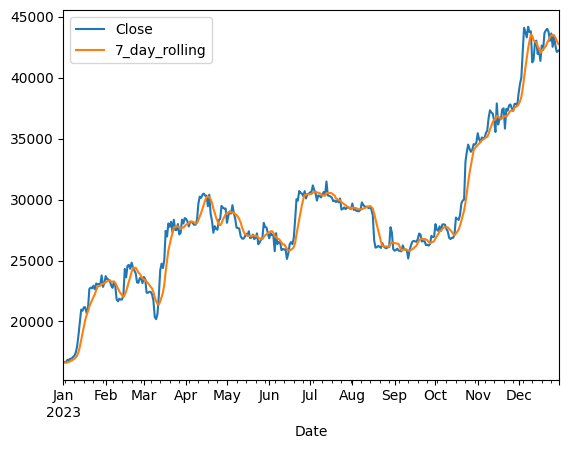

In [12]:
df['7_day_rolling']= df['Close'].rolling(window = 7).mean()
df[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [13]:
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [14]:
df['daily_returns'] = df ['Close'].pct_change() * 100

In [15]:
df[abs(df['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138995,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


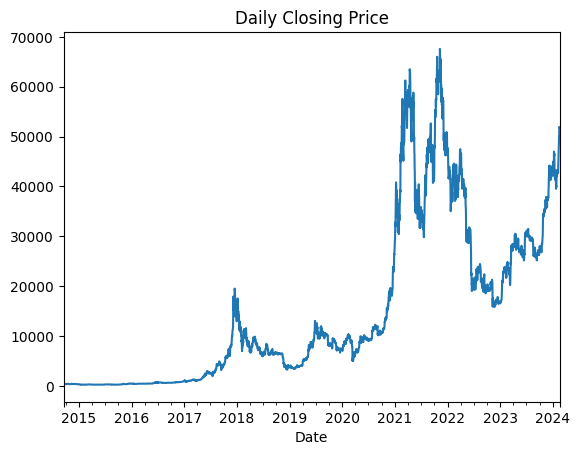

In [16]:
df['Close'].plot(title = 'Daily Closing Price')
plt.show()

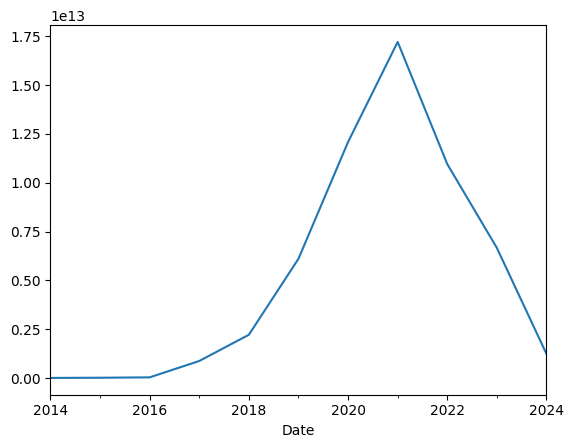

In [17]:
df.resample('YE').sum()['Volume'].plot()
plt.show()

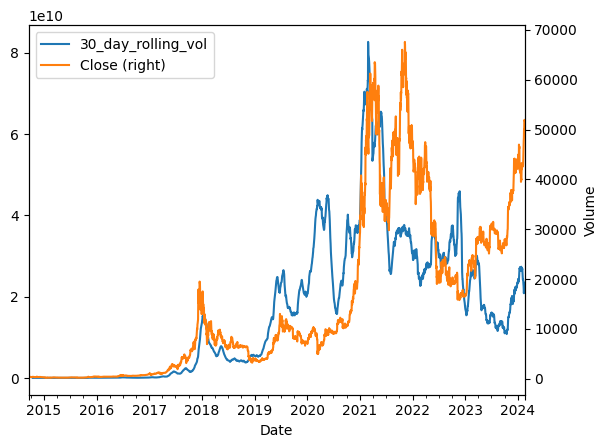

In [18]:
df['30_day_rolling_vol'] = df['Volume'].rolling(window =30).mean()
df['30_day_rolling_vol'].plot(legend = True)
ax = df['Close'].plot(secondary_y = True, legend = True)
ax.set_ylabel('Volume')
plt.show()

In [19]:
df[['Close','30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.744147
30_day_rolling_vol,0.744147,1.000000


In [20]:
df.isnull().sum()
df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)
df['7_day_rolling'].interpolate(inplace = True)

C:\Users\mckays1\AppData\Local\Temp\ipykernel_9256\3196935452.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_vol'].fillna(method = 'bfill', inplace = True)
C:\Users\mckays1\AppData\Local\Temp\ipykernel_9256\3196935452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['7_day_rolling'].interpolate(inplace = True)


In [21]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_rolling         6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [22]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

df['is_weekend'] = df.index.weekday > 4
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984264,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465855,3.624856e+07,2014,9,21,Sunday,6,True


In [23]:
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)

In [24]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

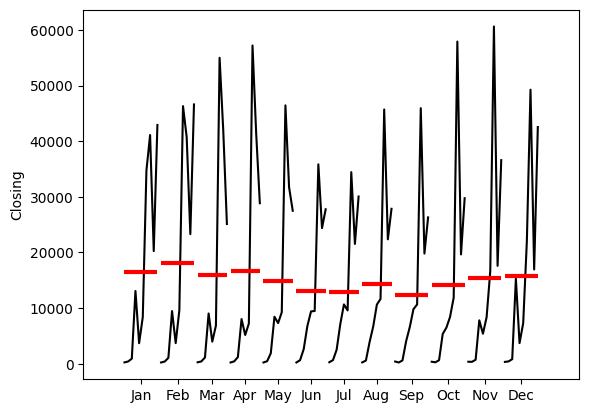

In [25]:
month_plot(df['Close'].resample('ME').mean(), ylabel = 'Closing')
plt.show()

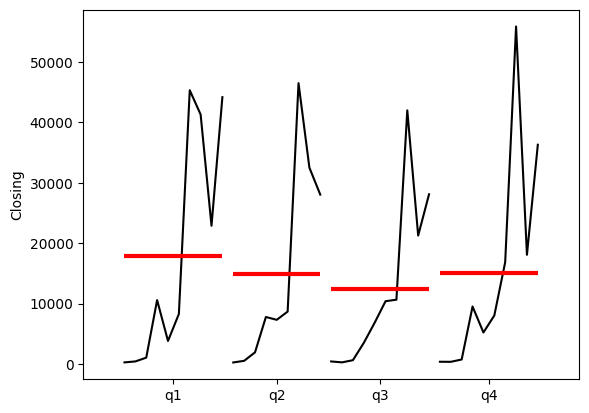

In [26]:
quarter_plot(df['Close'].resample('QE').mean(), ylabel = 'Closing')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

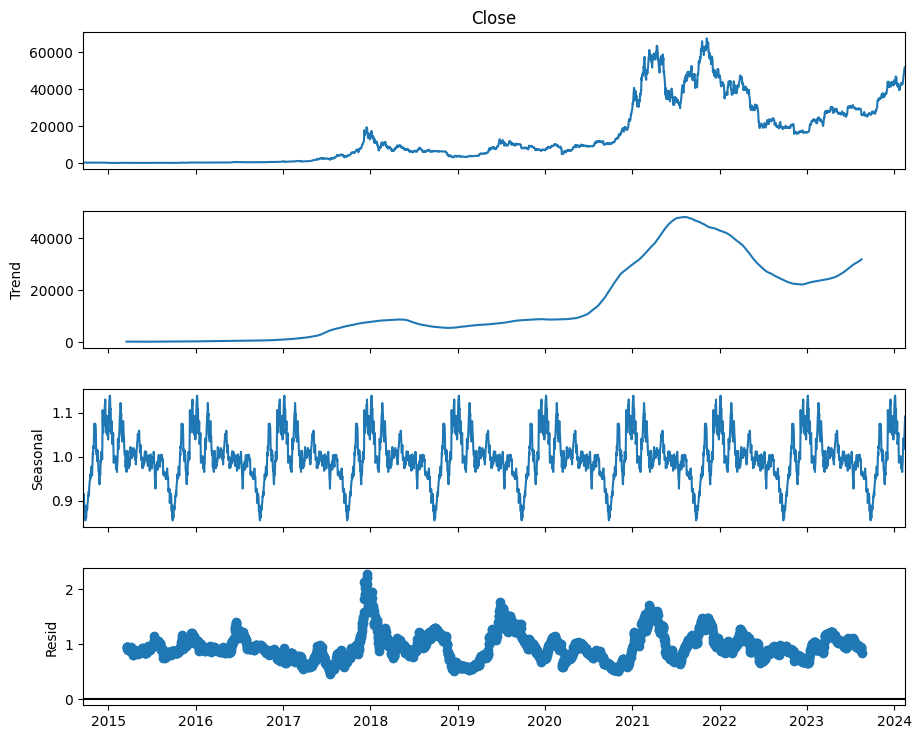

In [27]:
decomposition = seasonal_decompose(df['Close'], model = 'multiplicative', period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show

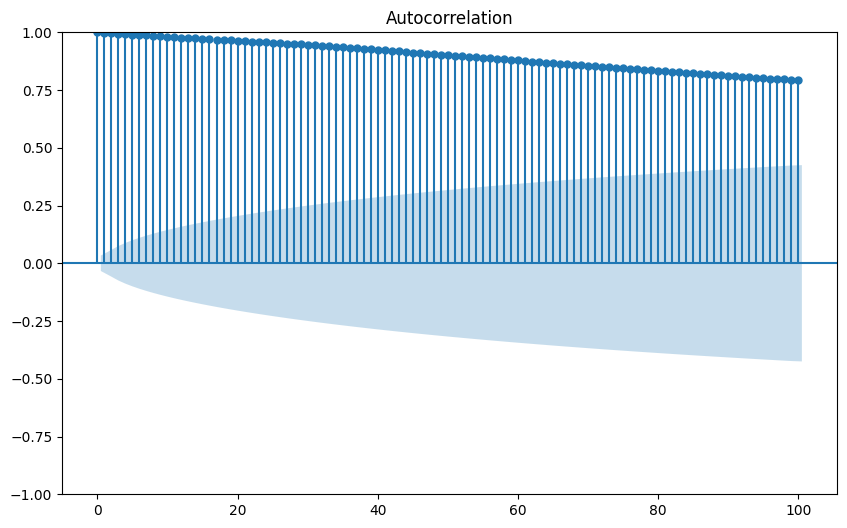

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Close'], lags = 100,ax = ax)
plt.show()

In [63]:
periods = 65
train, test = df.iloc[:-periods,0], df.iloc[-periods:,0]
train

Date
2014-09-17      465.864014
2014-09-18      456.859985
2014-09-19      424.102997
2014-09-20      394.673004
2014-09-21      408.084991
                  ...     
2023-12-09    44180.019531
2023-12-10    43728.382813
2023-12-11    43792.019531
2023-12-12    41238.734375
2023-12-13    41468.464844
Name: Open, Length: 3375, dtype: float64

In [64]:
#simple exponential smoothing
model_simple = SimpleExpSmoothing(train).fit()
predictions_simple = model_simple.forecast(len(test))

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


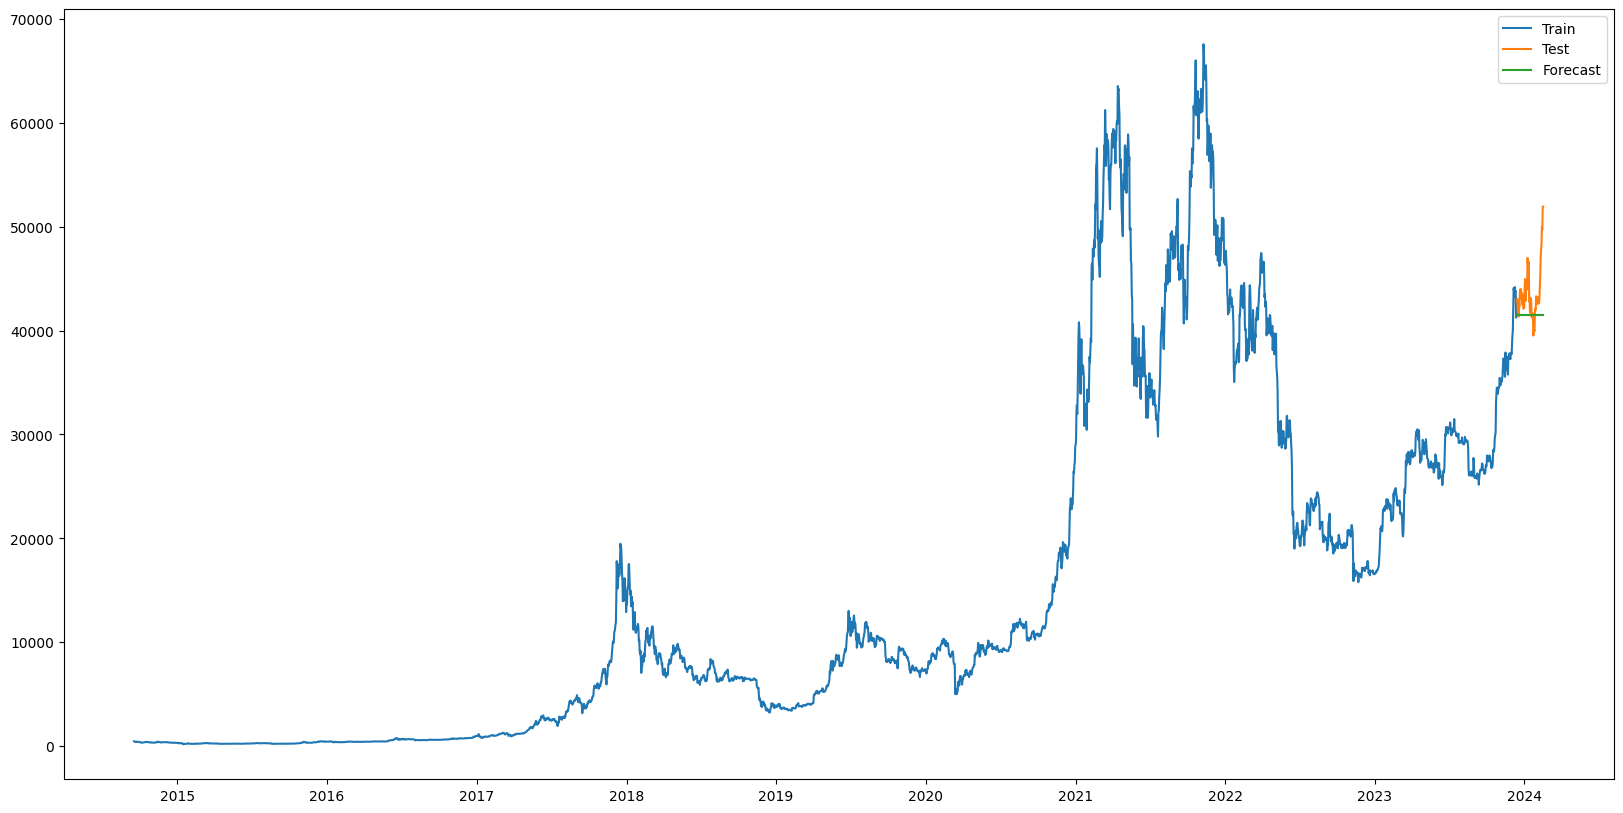

In [65]:
plt.figure(figsize = (20,10))
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_simple, label = 'Forecast')
plt.legend()
plt.show()

In [70]:
model_triple = ExponentialSmoothing(train, trend = 'mul', seasonal = 'mul', seasonal_periods = 150).fit()
predictions_triple = model_triple.forecast(len(test))

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


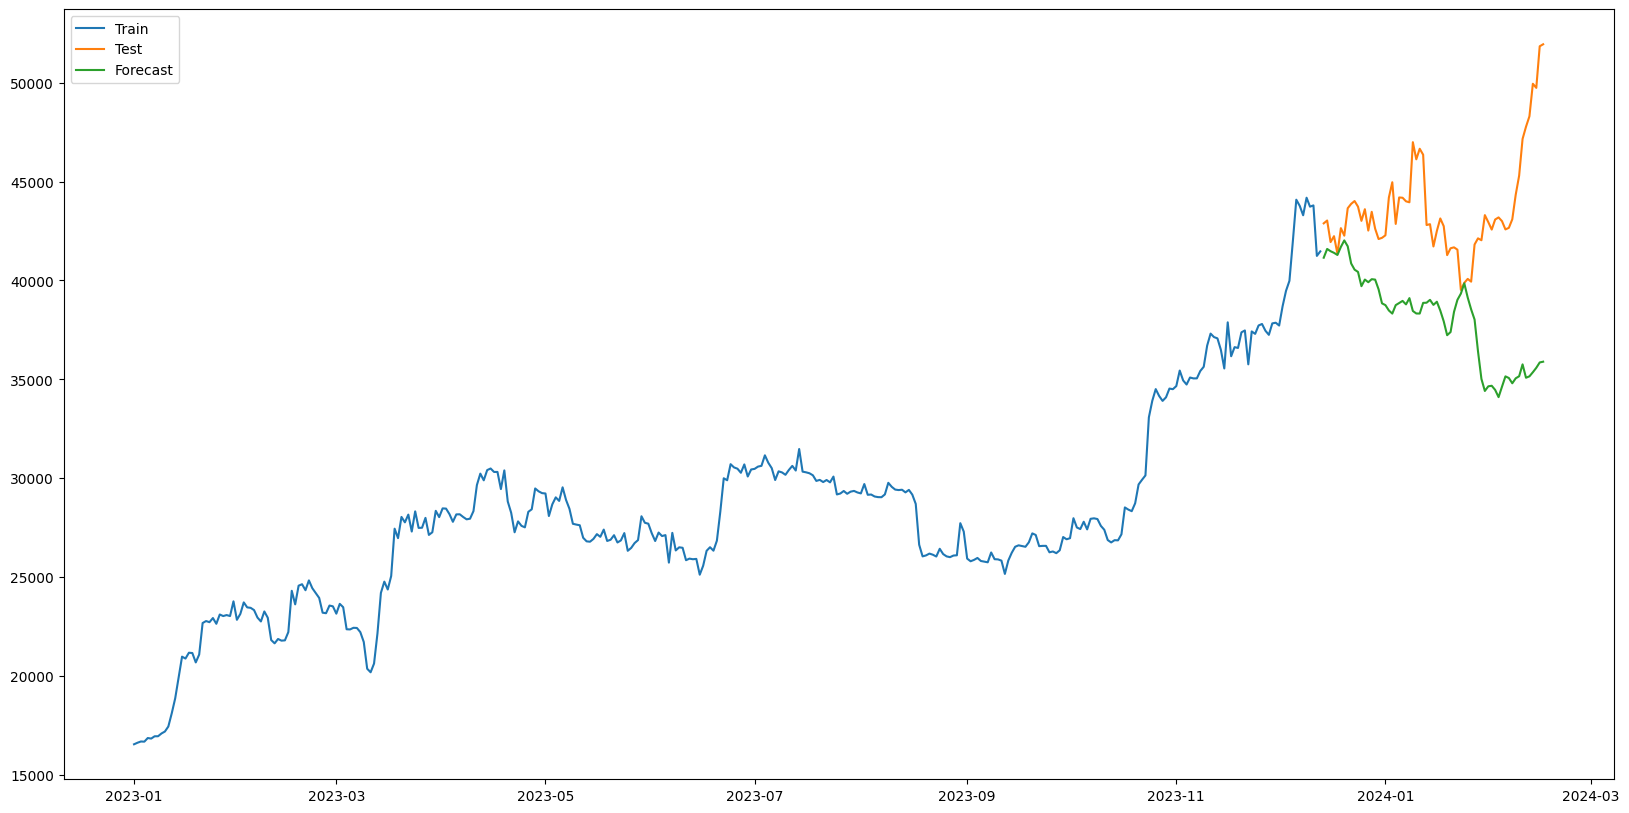

In [71]:
plt.figure(figsize = (20,10))
plt.plot(train['2023'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(predictions_triple, label = 'Forecast')
plt.legend()
plt.show()